El 3r script agafa una clau A i fa la sharedkey per una clau B un nomnbre fixe de vegades, també calcula la clau fent el blake2b amb l'OR i concatenat la sharedkey i les dos publiques com diu el document de crypt4g. Al document no queda molt clar com s'ha de fer si amb OR (||) o concatenat, per això es fa de les dos formes. L'script s'executa 9 vegades i s'agafen totes aquestes dades, cada dada es el nombre de 0 que apareix a cada bit.

## Entrada de dades

In [1]:
zeros <- c(499652, 499567, 500210, 499736, 499891, 500444, 499772, 499640, 500133, 500385, 500399, 500159, 499619, 498830, 499374, 500422, 499940, 500578, 500715, 499429, 500205, 499220, 500550, 500791, 500471, 500418, 500651, 499836, 500232, 500259, 500180, 499892, 499308, 499383, 500284, 500052, 500909, 500242, 499711, 500622, 499999, 500478, 499933, 499430, 500592, 499515, 500102, 500592, 500445, 499225, 500517, 500057, 500738, 500772, 500135, 500235, 500355, 499569, 499315, 500275, 499504, 499491, 500047, 499943, 500253, 499996, 500136, 499772, 500456, 499846, 500559, 500391, 500008, 499874, 499440, 499798, 501063, 500441, 500730, 498985, 499611, 499553, 500954, 500393, 499344, 499522, 499216, 499343, 500127, 499691, 500451, 500293, 500176, 500308, 500641, 500346, 499490, 500592, 499445, 499934, 499846, 500071, 498811, 499054, 500174, 500163, 499801, 500392, 498791, 500080, 499895, 500143, 500633, 499420, 500535, 499276, 499414, 499560, 500779, 500269, 500375, 500569, 498987, 499900, 499573, 499814, 500740, 500507, 499954, 500257, 500512, 499155, 500576, 500088, 500085, 499932, 500949, 500498, 499225, 500616, 499728, 500412, 500634, 500299, 500043, 499992, 499646, 499320, 500087, 499516, 500992, 500191, 499770, 499939, 499535, 499597, 500326, 499124, 499448, 499400, 499724, 500701, 499837, 500242, 499630, 499683, 500948, 499568, 499919, 499429, 500966, 500720, 500587, 499588, 499324, 500358, 500522, 499382, 500934, 500369, 499388, 500074, 500141, 499913, 500059, 499551, 499605, 500529, 500031, 500272, 500458, 500458, 499234, 500960, 499996, 499691, 499286, 501294, 500238, 500287, 500860, 499523, 500839, 500129, 499872, 500009, 500747, 499737, 499885, 500031, 499666, 499115, 500422, 500948, 500686, 499857, 500471, 500231, 500271, 499248, 499956, 499832, 500844, 500232, 500257, 499578, 500522, 499871, 499832, 500422, 499695, 500465, 500272, 500066, 500100, 499229, 500453, 500330, 499885, 500634, 500351, 499429, 500287, 500044, 500227, 500138, 500346, 499314, 500399, 499750, 499895, 498724, 500329, 500606, 500175, 499746, 499817, 499859, 499879, 499245, 499893, 500184, 500078, 499707, 500260, 499362, 500222, 499862, 499902, 499848, 499660, 499856, 499905, 499733, 500767, 500933, 500219, 499433, 499441, 500564, 500131, 499571, 499857, 500247, 500421, 500569, 500128, 500003, 500261, 500513, 499523, 499215, 499908, 499556, 500208, 500693, 499269, 499638, 499530, 499692, 500734, 500088, 499953, 499468, 499762, 499581, 498722, 499962, 500141, 499744, 500596, 500151, 500027, 499644, 500244, 499907, 499457, 499989, 500804, 499074, 500072, 500939, 500696, 500306, 500064, 499420, 499182, 500856, 499302, 499681, 501169, 499818, 501042, 500565, 500395, 499770, 501201, 499679, 499848, 500247, 500787, 499674, 501604, 499347, 500202, 500110, 498987, 500076, 499896, 499688, 499695, 499604, 500039, 500286, 500907, 500710, 500628, 500675, 499908, 499993, 499838, 499501, 500173, 499856, 499804, 500219, 500428, 500357, 499022, 499693, 499527, 499921, 499364, 500457, 499430, 500024, 500328, 499234, 499986, 501218, 499541, 500771, 500760, 500286, 501032, 500403, 500305, 500821, 500870, 500252, 499298, 499840, 500280, 499567, 499061, 499698, 499583, 499319, 499773, 500838, 500588, 499779, 500083, 499723, 499936, 500333, 499260, 500042, 499493, 499345, 500347, 499628, 499708, 500696, 500301, 498621, 500841, 501128, 499026, 499753, 500331, 499719, 499496, 500189, 499822, 499846, 500122, 499168, 500069, 499893, 499296, 500119, 500346, 500496, 499867, 500241, 499686, 499985, 500115, 499986, 499811, 499635, 500565, 501713, 500575, 500318, 500094, 499711, 500366, 500313, 499651, 499283, 500849, 500166, 500523, 499444, 500358, 500133, 500746, 498889, 499483, 499467, 500062, 500356, 500038, 500195, 499871, 499857, 499729, 500144, 499127, 499904, 498556, 499825, 500157, 499637, 499611, 499475, 500055, 500189, 499974, 500288, 499555, 500858, 500543, 499210, 498951, 500518, 499640, 499539, 500378, 499624, 500060, 500561, 500559, 500062, 499679, 499421, 500133, 500247, 499011, 500154, 499991, 499496, 499403, 500144, 499240, 499375, 499693, 500139, 499959, 500752, 499968, 499561, 499497, 500052, 499238, 499453, 499785, 500337, 500532, 499346, 499576, 499865, 499988, 499410, 500355, 500156, 499976, 499866, 499714, 500362, 499472, 499849, 500725, 499251, 499706, 500450, 500111, 500343, 499335, 499911, 500645, 499834, 500101, 499708, 500044, 499823, 499185, 499847, 499101, 499768, 500327, 498827, 499877, 500027, 500275, 499512, 499896, 499875, 499634, 499948, 499894, 500076, 499772, 500428, 500036, 499962, 499684, 500514, 498904, 500176, 500375, 500980, 499759, 498836, 499990, 499284, 500162, 499599, 500120, 500414, 500202, 500464, 499455, 500502, 499639, 500243, 500483, 499998, 499497, 500092, 500492, 501033, 499924, 500119, 500333, 500265, 500022, 500406, 500849, 499872, 499357, 499486, 500761, 499816, 499857, 499813, 501027, 499514, 500152, 500121, 499551, 499947, 499652, 499220, 500510, 499738, 500191, 500281, 499586, 499231, 500489, 499944, 499892, 499779, 500811, 499409, 500584, 499703, 499902, 499360, 499251, 500257, 500243, 500211, 499778, 500395, 500052, 499074, 499798, 500390, 499252, 500079, 500524, 500541, 499901, 499368, 500071, 498657, 499859, 500611, 500352, 498899, 501314, 500480, 500249, 499969, 500349, 499313, 500820, 499866, 499334, 499769, 500513, 499598, 499548, 500168, 499836, 499977, 499845, 500529, 499590, 500367, 499929, 500052, 500244, 500362, 500289, 500099, 499923, 499071, 500079, 499553, 500335, 500747, 500758, 500309, 499957, 500591, 499792, 500032, 500141, 499114, 499573, 499957, 499631, 499482, 500038, 499587, 500060, 499838, 500671, 499666, 500039, 499521, 500542, 499747, 500299, 499950, 500368, 498963, 499963, 499487, 499957, 499208, 499803, 500338, 500692, 499578, 500369, 499911, 499586, 498939, 500569, 499856, 500666, 499636, 500703, 499734, 499950, 500155, 500121, 500411, 500384, 499344, 500211, 500226, 499535, 500519, 499212, 499453, 499133, 500445, 499935, 500028, 500070, 500548, 500261, 500330, 499676, 500170, 500038, 500601, 499987, 499994, 500363, 499590, 499523, 499915, 500204, 499093, 499284, 500331, 500247, 498894, 500047, 499947, 499635, 500172, 498813, 499870, 500288, 499364, 499576, 500189, 500072, 499809, 501057, 499978, 500374, 500637, 499924, 499500, 500249, 499562, 500198, 499672, 500484, 500209, 499607, 499768, 500517, 499651, 500163, 500551, 499878, 500281, 500351, 500174, 499905, 499827, 500164, 499233, 499091, 500289, 500197, 500058, 500326, 499524, 499833, 500717, 500384, 500530, 500715, 500243, 499935, 499402, 499916, 500459, 499043, 500583, 500616, 499366, 499497, 500489, 499647, 499887, 498509, 499636, 500605, 499703, 500546, 499509, 500413, 499311, 500904, 499280, 500291, 499392, 501484, 500136, 499889, 500883, 499259, 500717, 499931, 500775, 500059, 499962, 499048, 500024, 500167, 499679, 500462, 500347, 500697, 500907, 499319, 500219, 499767, 499979, 500031, 499719, 499887, 499609, 500098, 500203, 499418, 498984, 499778, 500114, 500184, 499680, 499822, 498691, 500090, 499335, 499711, 500269, 500016, 500004, 499477, 500043, 499396, 499265, 499816, 500316, 499743, 500219, 499948, 500536, 500336, 500749, 499730, 500638, 499763, 499374, 499811, 499646, 500111, 499841, 499809, 500552, 499818, 499521, 499574, 500323, 498958, 499537, 500357, 499150, 499208, 499572, 499590, 500636, 500345, 500539, 500426, 500651, 500488, 500666, 499711, 499839, 499180, 499347, 501078, 499291, 500353, 499530, 500350, 499690, 499078, 499736, 500025, 499502, 500412, 499403, 499293, 499813, 499569, 499868, 500409, 499826, 500367, 500423, 500342, 499634, 500024, 499377, 499575, 500656, 500226, 499974, 500252, 500333, 499469, 500539, 499135, 499199, 500079, 499858, 499732, 500314, 500687, 500450, 500471, 499666, 499494, 500244, 500713, 499547, 499288, 499448, 499873, 499878, 500751, 500089, 499150, 500055, 500315, 499339, 500164, 499615, 500793, 500153, 499688, 500965, 499604, 499006, 499415, 499850, 499642, 499054, 499274, 498983, 498614, 500101, 500275, 499231, 500310, 499605, 500191, 499519, 500176, 499775, 500275, 499906, 500697, 500656, 500018, 500328, 500019, 499642, 500942, 499192, 500199, 499802, 500129, 499536, 499315, 500756, 500321, 499762, 499637, 500409, 499007, 499183, 499808, 499915, 500359, 499715, 500511, 499774, 499775, 500248, 499783, 500932, 499728, 499766, 500177, 499504, 500037, 499588, 500016, 500479, 499693, 499800, 500132, 500133, 499767, 499696, 500019, 500300, 500136, 500259, 500206, 500492, 499496, 499299, 500131, 499413, 499977, 500827, 499589, 500534, 500339, 499371, 500572, 500534, 500741, 499284, 500747, 499511, 500526, 499756, 499676, 498994, 499429, 500103, 500727, 499843, 500161, 500145, 500345, 499446, 500045, 498996, 499842, 499438, 500174, 499910, 500154, 500145, 500065, 499236, 499603, 499539, 499234, 500124, 500581, 499701, 500575, 500717, 500204, 499693, 499782, 500553, 500439, 500729, 499988, 499804, 500142, 500350, 499492, 499809, 499861, 499948, 500154, 500310, 500309, 500594, 500894, 499660, 499631, 500075, 499199, 500135, 499786, 500062, 499808, 499502, 499839, 500314, 500413, 500526, 499738, 499867, 500092, 499250, 500356, 499341, 500709, 500264, 500435, 500030, 500526, 499253, 499520, 499787, 500214, 501069, 500108, 500779, 499755, 500560, 499729, 499605, 499755, 499215, 500292, 500087, 499261, 500095, 500220, 499881, 499465, 500792, 499457, 500460, 499479, 500615, 500869, 500912, 500482, 500163, 500221, 500385, 500911, 500128, 500534, 499794, 499769, 500633, 499623, 500805, 499672, 499599, 499815, 499138, 500106, 499189, 500686, 500183, 499562, 500285, 500036, 500230, 500170, 499400, 500611, 499848, 500365, 499983, 500629, 500125, 499701, 499913, 499430, 500378, 500381, 499801, 500725, 500499, 499218, 499535, 500397, 499452, 499584, 500529, 500058, 499900, 500494, 500113, 500033, 499624, 499704, 500291, 499618, 500129, 500384, 499689, 498843, 500416, 500085, 500453, 500716, 499986, 499969, 498959, 500837, 499496, 499824, 500374, 499624, 499695, 499479, 500295, 500029, 499341, 500234, 500134, 499592, 500107, 499678, 499872, 500581, 498948, 499726, 500916, 499951, 499083, 500256, 499731, 500184, 500345, 499662, 499867, 499896, 500091, 500576, 499557, 500144, 500471, 499531, 499582, 501011, 499464, 499670, 500521, 500517, 499547, 500224, 500084, 499252, 499776, 499458, 500275, 500699, 498852, 500214, 499062, 499120, 499632, 500082, 500724, 499493, 499218, 500018, 500630, 499912, 500070, 500501, 500549, 500312, 500026, 500783, 499835, 499889, 500413, 500144, 500609, 498567, 499818, 500327, 500079, 499802, 499124, 500223, 499863, 499672, 500299, 499796, 500502, 499784, 500205, 499708, 499597, 499849, 500500, 499697, 500269, 499631, 499747, 500293, 499823, 499848, 499119, 499512, 500536, 500331, 499620, 500496, 499387, 499965, 499702, 500400, 499398, 500284, 500089, 500249, 500308, 500408, 499896, 499924, 499403, 500693, 501096, 500700, 500491, 499117, 500445, 498979, 500080, 499652, 500368, 500565, 499345, 500869, 500013, 499342, 499647, 500067, 501245, 500076, 500429, 499016, 500043, 500040, 499523, 500615, 500534, 499811, 499727, 499969, 499955, 501201, 499783, 500247, 499754, 499509, 499977, 499723, 499458, 500057, 500815, 500400, 500704, 500386, 499916, 500153, 499691, 499778, 499853, 500053, 499755, 499686, 499138, 500374, 500466, 499180, 498981, 499164, 500056, 500433, 500118, 500653, 501443, 499476, 500962, 500634, 500192, 500189, 500337, 500444, 500354, 500454, 500269, 499625, 500814, 500284, 498789, 499428, 500630, 501359, 500985, 500475, 500157, 500729, 500127, 500501, 499851, 500515, 499307, 499911, 499875, 500256, 500719, 499895, 500254, 499674, 501014, 500891, 499510, 500642, 499115, 499268, 499363, 500100, 498596, 500257, 500242, 500308, 499712, 500860, 499608, 499779, 500747, 500974, 499263, 499830, 499598, 501150, 500388, 500186, 499641, 500243, 499523, 500151, 500338, 500569, 500111, 500170, 499794, 500074, 500576, 500740, 500186, 499784, 499882, 499115, 500520, 500473, 499973, 499704, 500005, 499741, 501067, 500095, 500330, 500426, 499234, 500768, 499729, 500013, 500364, 500102, 499908, 500610, 500578, 499868, 500642, 499539, 499927, 500397, 499910, 500559, 499275, 499132, 499630, 499325, 499277, 499944, 500217, 500170, 499701, 499849, 500082, 499472, 499742, 500000, 499472, 500557, 499867, 500997, 498969, 499275, 500312, 499619, 500647, 499691, 500767, 499825, 499935, 499281, 499714, 499004, 500308, 500439, 500230, 499786, 499157, 500556, 499788, 499760, 499470, 499883, 498529, 500415, 499508, 499370, 500263, 499847, 500080, 499532, 501194, 500225, 500741, 499814, 500707, 500100, 499804, 499701, 500111, 499810, 499323, 499043, 500217, 499104, 500887, 499971, 500644, 500140, 500607, 500220, 499966, 500695, 499890, 499656, 500282, 499868, 500564, 499970, 500548, 500775, 499225, 499587, 499864, 499859, 500022, 499163, 499865, 499793, 500129, 499776, 499972, 500003, 500518, 500435, 499617, 499940, 500361, 500195, 499811, 500078, 500101, 499655, 500370, 499487, 499823, 499483, 499965, 499296, 500163, 500584, 499983, 500496, 500057, 499628, 500844, 500024, 499926, 500868, 499777, 500246, 499466, 499611, 499968, 500010, 500690, 499824, 499204, 500217, 500748, 500003, 499941, 500100, 500250, 500104, 500133, 500347, 500700, 499536, 500143, 499994, 500170, 499856, 499543, 499994, 499780, 500067, 499946, 499367, 500543, 499988, 500049, 500631, 500248, 500032, 499795, 499731, 500401, 499527, 501029, 499244, 500282, 499730, 499771, 500363, 500323, 500644, 499750, 500384, 500692, 500024, 499579, 500352, 499932, 500152, 500395, 500356, 500520, 500281, 499942, 499580, 499465, 499669, 500264, 499376, 500382, 499577, 499575, 499664, 499822, 501234, 499557, 500139, 499759, 500099, 500318, 499495, 499932, 499411, 500392, 499885, 500013, 499908, 500031, 499963, 500526, 500489, 499605, 500319, 499753, 500677, 499769, 499556, 501152, 501265, 500648, 499972, 500412, 500281, 499481, 499386, 500246, 500133, 499944, 499808, 499774, 501038, 500665, 500237, 499878, 500027, 500247, 500439, 499521, 499920, 499799, 500191, 499867, 500435, 500528, 500520, 500137, 499943, 499874, 500303, 498672, 499765, 500381, 500317, 499984, 500337, 499687, 499761, 501015, 500157, 499968, 499530, 499423, 499637, 500496, 499763, 499829, 499303, 500729, 500711, 499491, 500067, 500955, 499447, 500003, 500176, 500115, 499602, 499457, 500212, 499929, 500120, 500183, 499615, 499415, 499832, 500016, 500067, 499779, 500736, 499924, 500080, 499427, 499766, 499977, 500842, 499733, 501134, 499740, 499751, 500025, 500436, 500166, 500132, 500174, 500767, 499518, 500051, 499854, 499189, 499890, 499735, 500343, 500494, 499635, 500226, 500572, 499530, 500057, 499688, 500465, 500037, 500355, 500417, 499306, 499783, 499814, 499318, 498697, 500407, 500019, 500917, 500061, 500325, 500126, 499814, 499828, 500462, 499733, 500168, 499885, 500727, 500532, 500073, 500274, 499846, 499564, 500218, 500808, 499848, 500757, 500418, 499800, 500343, 499906, 499868, 501197, 499706, 499671, 500435, 499240, 499495, 500347, 499701, 499660, 501047, 499596, 500515, 500669, 500159, 499009, 499742, 501209, 499807, 500310, 500838, 500773, 499685, 499394, 500460, 499669, 500774, 500137, 499745, 500218, 499694, 499744, 500042, 499560, 499320, 499905, 500242, 500651, 500135, 499539, 499671, 499837, 501109, 500417, 499235, 499397, 500062, 499382, 498949, 500250, 499401, 499997, 500274, 499296, 500142, 500078, 500040, 499194, 500018, 499953, 500046, 500952, 500390, 499954, 500277, 499142, 500143, 499436, 499605, 500366, 500004, 500569, 500137, 499855, 499307, 500596, 501275, 499392, 499362, 500387, 499753, 499427, 499865, 499185, 500108, 499297, 500584, 500031, 500146, 501069, 500517, 501007, 499114, 500258, 500231, 499745, 500156, 500232, 500258, 499657, 500094, 499735, 499912, 500389, 500889, 499908, 500808, 499349, 500335, 499884, 499624, 499632, 499822, 499294, 499980, 500004, 498965, 499905, 499613, 499597, 499753, 500233, 499903, 499789, 499604, 501418, 500164, 499730, 499489, 499652, 499856, 499644, 500648, 500651, 499638, 500116, 500392, 500543, 499180, 500785, 500505, 499515, 499945, 500406, 499872, 499117, 499820, 499337, 500067, 500091, 499606, 499352, 499404, 499165, 500354, 500671, 500072, 500570, 499356, 499888, 500011, 499827, 500712, 499978, 499713, 499982, 499817, 500076, 500370, 500063, 500184, 499621, 500662, 499920, 499999, 500801, 499490, 500282, 499959, 500308, 499967, 499704, 499920, 499614, 500035, 499512, 500426, 499742, 499542, 499710, 499879, 499788, 499169, 500335, 500305, 500071, 500479, 499312, 500678, 500481, 499715, 500187, 499149, 499965, 499970, 500133, 499695, 499105, 500529, 499962, 499757, 499769, 500442, 499292, 500587, 500617, 500554, 499918, 500343, 499902, 500026, 499608, 500451, 500179, 500496, 499501, 499203, 499590, 500323, 500037, 499371, 499949, 499984, 499792, 500420, 500304, 500458, 499993, 499808, 499297, 500042, 499696, 498837, 500065, 499443, 500413, 500516, 499625, 499758, 500173, 500454, 500067, 500185, 500407, 500299, 500005, 500336, 501109, 500346, 500048, 500167, 500637, 500609, 499320, 499874, 499545, 499826, 500440, 499637, 500508, 499125, 500310, 499895, 499864, 500656, 499939, 499483, 500404, 501131, 499438, 499764, 499469, 499438, 499664, 500213, 500080, 500200, 500251, 500193, 500374, 500055, 498989, 499865, 500019, 500198, 499336, 499222, 499697, 499406, 499700, 499490, 499600, 500726, 500391, 500386, 499016, 500178, 499736, 500137, 499532, 498582, 500385, 499639, 500611, 500102, 500661, 499447, 500509, 500083, 499727, 500340, 500196, 500192, 499805, 500561, 499841, 499875, 499825, 499522, 499778, 500224, 499507, 500044, 500099, 500452, 499762, 498865, 499726, 500366, 499390, 500299, 499615, 500287, 499517, 500980, 500350, 500434, 499759, 500268, 499465, 499677, 500537, 499130, 499875, 499574, 499705, 500445, 499439, 500342, 499712, 499771, 499507, 499931, 500732, 500079, 500216, 500221, 500349, 500403, 500574, 499656, 499786, 499418, 499579, 499432, 500434, 500153, 500805, 499246, 499322, 500621, 500053, 499801, 499744, 498356, 500386, 498971, 500376, 500253, 500245, 500176, 500245, 499900, 499813, 500539, 500541, 499339, 499842, 500199, 500333, 499926, 499691, 499767, 499876, 499368, 499233, 500568, 500233, 499955, 499421, 500304, 499881, 499768, 500074, 500465, 499188, 500183, 499739, 500827, 500448, 499711, 499798, 500630, 499327, 499782, 500462, 499718, 500776, 499824, 500610, 499418, 499838, 500198, 500259, 499807, 499379, 500694, 500640, 500238, 500252)

In [2]:
zerosor <- c(1000000, 624768, 0, 375232, 875775, 562257, 563025, 500209, 1000000, 624760, 0, 375240, 875062, 561736, 562525, 500291, 1000000, 625123, 0, 374877, 875016, 562190, 562082, 500684, 1000000, 624946, 0, 375054, 874835, 563484, 563486, 499969, 1000000, 624373, 0, 375627, 875787, 561928, 561772, 500883, 1000000, 624765, 0, 375235, 874878, 562152, 562331, 501021, 1000000, 624928, 0, 375072, 874931, 561844, 563466, 500411, 1000000, 625122, 0, 374878, 874664, 562194, 562823, 499615, 1000000, 625403, 0, 374597, 874991, 562876, 562288, 500457, 1000000, 624886, 0, 375114, 875458, 562022, 563419, 500710, 1000000, 625818, 0, 374182, 874928, 562921, 562249, 499817, 1000000, 624649, 0, 375351, 875236, 562145, 562945, 499837, 1000000, 625164, 0, 374836, 874734, 562513, 562607, 501088, 1000000, 624544, 0, 375456, 874837, 563149, 563557, 499603, 1000000, 624145, 0, 375855, 875350, 562264, 562333, 499133, 1000000, 625329, 0, 374671, 874888, 562167, 561489, 500077, 1000000, 624353, 0, 375647, 875355, 562686, 562298, 499899, 1000000, 625242, 0, 374758, 874838, 562228, 563794, 499905, 1000000, 624909, 0, 375091, 875277, 562528, 562569, 499436, 1000000, 625233, 0, 374767, 874956, 562340, 562319, 499817, 1000000, 625055, 0, 374945, 874564, 562557, 562135, 499606, 1000000, 625017, 0, 374983, 875168, 562685, 561645, 499505, 1000000, 625647, 0, 374353, 874619, 562710, 561734, 499814, 1000000, 626165, 0, 373835, 874827, 562075, 562909, 499848, 1000000, 623943, 0, 376057, 875553, 561634, 561259, 499746, 1000000, 625521, 0, 374479, 874809, 562927, 562635, 499955, 1000000, 624610, 0, 375390, 875042, 562506, 562936, 499845, 1000000, 625321, 0, 374679, 875113, 562271, 563436, 499105, 1000000, 625522, 0, 374478, 874854, 562932, 561936, 499778, 1000000, 625021, 0, 374979, 875134, 561639, 562411, 500065, 1000000, 625028, 0, 374972, 875371, 562690, 562009, 500238, 1000000, 625071, 0, 374929, 874476, 562451, 563233, 499543, 1000000, 625056, 0, 374944, 874556, 562920, 563349, 499862, 1000000, 624443, 0, 375557, 875213, 562958, 562588, 499969, 1000000, 624391, 0, 375609, 875069, 560947, 562502, 500110, 1000000, 624688, 0, 375312, 874344, 562908, 563093, 499918, 1000000, 624790, 0, 375210, 875071, 561485, 562770, 499820, 1000000, 625081, 0, 374919, 875004, 561156, 562147, 500871, 1000000, 624330, 0, 375670, 874970, 562141, 562697, 500079, 1000000, 624526, 0, 375474, 875168, 562936, 562091, 500050, 1000000, 625023, 0, 374977, 874758, 562647, 562991, 500086, 1000000, 625447, 0, 374553, 874972, 562763, 562365, 499731, 1000000, 625018, 0, 374982, 874515, 562308, 562530, 500246, 1000000, 625215, 0, 374785, 874749, 562817, 562797, 499753, 1000000, 625263, 0, 374737, 875708, 561495, 563185, 499751, 1000000, 626012, 0, 373988, 874971, 562331, 562473, 499588, 1000000, 624705, 0, 375295, 874578, 562702, 561817, 500716, 1000000, 625778, 0, 374222, 875129, 563763, 562049, 499277, 1000000, 624778, 0, 375222, 874953, 562885, 562594, 500313, 1000000, 625257, 0, 374743, 875107, 562713, 563030, 500090, 1000000, 625123, 0, 374877, 875308, 562836, 561892, 499971, 1000000, 625526, 0, 374474, 875284, 562132, 562777, 499069, 1000000, 625480, 0, 374520, 874953, 562477, 562546, 499744, 1000000, 625797, 0, 374203, 874810, 563174, 562952, 499173, 1000000, 624892, 0, 375108, 874858, 562825, 561619, 500387, 1000000, 624924, 0, 375076, 874565, 562303, 562422, 499589, 1000000, 626237, 0, 373763, 875043, 562933, 561448, 499427, 1000000, 624464, 0, 375536, 875085, 562494, 562807, 499503, 1000000, 624698, 0, 375302, 874843, 563661, 562659, 500231, 1000000, 625201, 0, 374799, 874703, 562214, 563209, 499620, 1000000, 625135, 0, 374865, 874844, 563082, 562543, 500950, 1000000, 625685, 0, 374315, 874836, 563670, 562281, 500387, 1000000, 625007, 0, 374993, 875149, 563104, 562122, 499914, 1000000, 625876, 0, 374124, 874593, 562944, 562746, 499678, 1000000, 624352, 0, 375648, 874013, 563191, 562670, 500550, 1000000, 625271, 0, 374729, 875165, 561760, 562450, 500884, 1000000, 624527, 0, 375473, 875266, 562488, 561876, 500511, 1000000, 625482, 0, 374518, 874821, 563147, 561967, 500422, 1000000, 624405, 0, 375595, 875308, 561639, 561796, 500236, 1000000, 625069, 0, 374931, 874933, 563783, 561746, 499734, 1000000, 625314, 0, 374686, 874974, 562835, 562667, 499913, 1000000, 624962, 0, 375038, 875143, 562489, 562796, 500740, 1000000, 624793, 0, 375207, 875211, 562926, 562281, 500573, 1000000, 625486, 0, 374514, 874679, 562235, 562751, 499820, 1000000, 624946, 0, 375054, 874694, 562600, 562147, 499884, 1000000, 625234, 0, 374766, 874801, 562602, 564204, 499182, 1000000, 625650, 0, 374350, 874930, 562097, 561875, 500721, 1000000, 624793, 0, 375207, 874545, 562631, 562246, 500158, 1000000, 624256, 0, 375744, 874634, 562235, 563558, 499944, 1000000, 625017, 0, 374983, 874709, 562798, 562425, 499699, 1000000, 624215, 0, 375785, 874985, 561875, 562894, 499438, 1000000, 624478, 0, 375522, 875249, 562347, 562630, 500126, 1000000, 624838, 0, 375162, 874766, 563331, 561799, 499546, 1000000, 625350, 0, 374650, 874640, 563150, 563473, 499418, 1000000, 624667, 0, 375333, 875022, 562576, 562032, 500350, 1000000, 624875, 0, 375125, 875586, 562880, 562638, 499385, 1000000, 625416, 0, 374584, 875073, 562168, 563526, 501235, 1000000, 624931, 0, 375069, 875167, 562509, 562160, 500006, 1000000, 625333, 0, 374667, 874709, 562886, 562681, 500031, 1000000, 625816, 0, 374184, 875231, 562711, 562198, 499365, 1000000, 624664, 0, 375336, 875652, 562525, 561828, 500190, 1000000, 624896, 0, 375104, 875167, 562415, 562069, 500010, 1000000, 624946, 0, 375054, 874837, 562537, 562509, 500312, 1000000, 625173, 0, 374827, 874786, 562788, 562704, 500096, 1000000, 624896, 0, 375104, 875572, 562890, 562685, 499406, 1000000, 625285, 0, 374715, 875053, 562019, 562349, 500638, 1000000, 624806, 0, 375194, 875170, 562486, 561995, 499382, 1000000, 624716, 0, 375284, 875348, 562429, 562909, 499534, 1000000, 624368, 0, 375632, 875155, 562450, 562110, 500230, 1000000, 625004, 0, 374996, 874992, 562426, 562836, 501172, 1000000, 624358, 0, 375642, 875681, 561588, 561737, 500302, 1000000, 625742, 0, 374258, 874952, 563530, 563384, 499414, 1000000, 625464, 0, 374536, 875140, 562285, 562827, 500942, 1000000, 625273, 0, 374727, 875178, 563455, 562549, 499533, 1000000, 624889, 0, 375111, 874686, 562191, 562848, 499932, 1000000, 624389, 0, 375611, 875599, 562424, 562865, 498922, 1000000, 624748, 0, 375252, 875319, 561854, 562283, 500825, 1000000, 624981, 0, 375019, 875320, 562531, 562241, 500436, 1000000, 625071, 0, 374929, 875158, 562591, 562715, 499810, 1000000, 624648, 0, 375352, 875398, 563090, 562748, 500065, 1000000, 624388, 0, 375612, 875395, 561555, 562823, 499971, 1000000, 624944, 0, 375056, 874772, 562969, 562447, 498957, 1000000, 626324, 0, 373676, 875324, 562804, 562437, 499375, 1000000, 624942, 0, 375058, 875058, 562506, 562592, 500677, 1000000, 624862, 0, 375138, 874637, 562131, 563216, 499485, 1000000, 624597, 0, 375403, 875163, 562580, 563102, 500534, 1000000, 624443, 0, 375557, 875078, 562472, 561664, 499923, 1000000, 625203, 0, 374797, 875314, 562495, 562275, 500412, 1000000, 626465, 0, 373535, 875083, 563203, 562219, 499738, 1000000, 624754, 0, 375246, 875584, 562767, 562743, 499700, 1000000, 624424, 0, 375576, 874775, 562726, 562283, 500539, 1000000, 625114, 0, 374886, 874935, 562137, 562068, 499848, 1000000, 624741, 0, 375259, 874586, 562247, 562912, 499788, 1000000, 624968, 0, 375032, 874966, 563188, 562643, 500671, 1000000, 625377, 0, 374623, 874728, 562874, 563289, 499512, 1000000, 625121, 0, 374879, 874787, 562509, 562331, 499680, 1000000, 626370, 0, 373630, 874876, 562056, 562495, 499698, 1000000, 624317, 0, 375683, 874891, 562892, 562685, 500427, 1000000, 625716, 0, 374284, 874502, 562729, 562792, 499571, 1000000, 624598, 0, 375402, 874942, 562388, 563239, 500268, 1000000, 624898, 0, 375102, 875326, 561500, 561228, 500034, 1000000, 625097, 0, 374903, 874951, 562391, 562547, 499856, 1000000, 625207, 0, 374793, 874797, 562477, 563436, 499675, 1000000, 624575, 0, 375425, 875393, 562866, 562582, 499703, 1000000, 624668, 0, 375332, 875037, 561988, 562232, 499609, 1000000, 624767, 0, 375233, 875170, 561375, 562389, 499721, 1000000, 625026, 0, 374974, 875523, 561923, 562248, 500570, 1000000, 624543, 0, 375457, 874640, 562911, 563204, 499952, 1000000, 625490, 0, 374510, 874854, 562343, 563135, 500053, 1000000, 625728, 0, 374272, 874829, 562073, 563259, 499790, 1000000, 625787, 0, 374213, 875286, 562462, 562820, 499363, 1000000, 625235, 0, 374765, 874772, 562665, 563153, 500267, 1000000, 625802, 0, 374198, 874767, 562927, 562128, 500245, 1000000, 625001, 0, 374999, 875096, 562626, 563101, 499813, 1000000, 624607, 0, 375393, 875374, 562610, 561643, 499027, 1000000, 624576, 0, 375424, 875087, 562473, 561894, 498935, 1000000, 625304, 0, 374696, 875224, 562395, 563512, 500150, 1000000, 625387, 0, 374613, 874771, 563029, 563228, 500557, 1000000, 624312, 0, 375688, 875761, 562455, 562271, 500447, 1000000, 624610, 0, 375390, 875457, 561416, 562864, 500669, 1000000, 625618, 0, 374382, 874803, 563339, 563079, 499972, 1000000, 624517, 0, 375483, 875445, 561784, 562545, 500168, 1000000, 625760, 0, 374240, 875175, 561879, 561890, 500102, 1000000, 625329, 0, 374671, 875492, 561566, 562520, 500160, 1000000, 625648, 0, 374352, 874977, 562372, 562377, 500474, 1000000, 625572, 0, 374428, 874546, 562070, 563057, 500006, 1000000, 625081, 0, 374919, 874459, 562701, 561702, 500795, 1000000, 625079, 0, 374921, 875071, 562128, 562632, 500071, 1000000, 625341, 0, 374659, 874525, 562873, 562646, 498855, 1000000, 624913, 0, 375087, 875287, 561943, 562401, 500149, 1000000, 624444, 0, 375556, 875111, 562566, 561974, 499491, 1000000, 625486, 0, 374514, 875344, 562303, 562531, 500056, 1000000, 625034, 0, 374966, 875350, 562109, 562199, 500276, 1000000, 624734, 0, 375266, 874847, 562338, 563661, 499499, 1000000, 624483, 0, 375517, 874787, 562352, 562984, 501067, 1000000, 625680, 0, 374320, 875159, 562262, 561689, 499208, 1000000, 624440, 0, 375560, 874819, 562026, 562154, 500557, 1000000, 624705, 0, 375295, 874971, 562426, 562990, 498821, 1000000, 625128, 0, 374872, 875233, 562441, 561301, 501593, 1000000, 625031, 0, 374969, 875447, 562053, 562262, 498648, 1000000, 625097, 0, 374903, 875383, 561743, 562007, 499040, 1000000, 625548, 0, 374452, 874593, 563087, 562297, 500872, 1000000, 625578, 0, 374422, 874628, 562165, 562977, 500344, 1000000, 624508, 0, 375492, 874966, 562052, 563448, 500163, 1000000, 624633, 0, 375367, 874670, 563666, 562057, 500064, 1000000, 624886, 0, 375114, 875350, 562415, 562193, 500147, 1000000, 625017, 0, 374983, 875176, 562953, 562939, 500169, 1000000, 625537, 0, 374463, 874763, 562542, 562044, 499941, 1000000, 624640, 0, 375360, 874943, 562844, 562646, 499869, 1000000, 625406, 0, 374594, 874824, 563194, 561917, 500731, 1000000, 624830, 0, 375170, 874990, 562451, 562259, 501057, 1000000, 624788, 0, 375212, 875218, 562136, 562573, 500457, 1000000, 625198, 0, 374802, 874533, 562613, 562959, 499385, 1000000, 625197, 0, 374803, 875510, 562349, 562524, 499386, 1000000, 625512, 0, 374488, 875158, 562433, 562337, 499731, 1000000, 625755, 0, 374245, 874654, 562741, 562698, 499888, 1000000, 626315, 0, 373685, 875486, 561876, 563058, 500363, 1000000, 624772, 0, 375228, 874881, 562480, 562260, 500212, 1000000, 624582, 0, 375418, 874648, 562609, 562976, 499829, 1000000, 625176, 0, 374824, 874751, 562375, 562606, 500549, 1000000, 625602, 0, 374398, 874821, 563360, 562194, 499414, 1000000, 624631, 0, 375369, 874468, 563089, 562871, 499249, 1000000, 624872, 0, 375128, 874800, 562624, 562463, 500586, 1000000, 624743, 0, 375257, 875011, 563623, 562321, 500497, 1000000, 625156, 0, 374844, 874687, 562851, 562875, 500555, 1000000, 624841, 0, 375159, 874897, 562194, 562574, 500609, 1000000, 624948, 0, 375052, 875016, 561963, 562852, 499554, 1000000, 624730, 0, 375270, 875210, 562148, 562609, 499958, 1000000, 624920, 0, 375080, 875279, 561975, 562087, 499817, 1000000, 624336, 0, 375664, 874997, 562294, 562664, 499912, 1000000, 625072, 0, 374928, 875368, 562381, 562744, 499737, 1000000, 624402, 0, 375598, 874950, 563443, 562016, 499341, 1000000, 625220, 0, 374780, 874800, 562580, 563059, 499997, 1000000, 625271, 0, 374729, 875010, 562421, 562825, 499856, 1000000, 625008, 0, 374992, 874769, 562526, 562075, 500689, 1000000, 625353, 0, 374647, 874791, 562941, 563081, 499690, 1000000, 625364, 0, 374636, 875036, 562307, 562451, 499479, 1000000, 625236, 0, 374764, 875085, 562035, 562735, 499923, 1000000, 624900, 0, 375100, 875231, 562053, 563299, 499787, 1000000, 624254, 0, 375746, 874959, 562759, 561852, 501090, 1000000, 625272, 0, 374728, 875091, 562174, 563187, 499529, 1000000, 625411, 0, 374589, 874441, 562288, 563363, 499721, 1000000, 625700, 0, 374300, 875043, 562593, 562381, 499642, 1000000, 625304, 0, 374696, 875011, 562779, 562503, 500065, 1000000, 624722, 0, 375278, 875289, 561130, 563285, 501152, 1000000, 625355, 0, 374645, 874854, 562587, 561771, 500693, 1000000, 624432, 0, 375568, 874996, 562393, 562059, 500427, 1000000, 624537, 0, 375463, 875230, 562520, 562065, 500767, 1000000, 625528, 0, 374472, 874837, 563174, 562649, 500235, 1000000, 625331, 0, 374669, 874922, 562234, 562480, 499809, 1000000, 625098, 0, 374902, 874713, 562526, 563346, 500178, 1000000, 625288, 0, 374712, 874908, 562344, 562167, 500737, 1000000, 624962, 0, 375038, 874801, 562769, 562867, 500321, 1000000, 625384, 0, 374616, 874802, 563613, 561721, 499757, 1000000, 625317, 0, 374683, 874237, 563081, 562811, 499881, 1000000, 624862, 0, 375138, 875516, 562115, 562504, 499625, 1000000, 625634, 0, 374366, 874597, 562872, 563301, 499001, 1000000, 625405, 0, 374595, 874770, 561429, 562732, 500138, 1000000, 625953, 0, 374047, 875504, 563438, 562324, 500361, 1000000, 625045, 0, 374955, 874763, 562528, 562379, 499620, 1000000, 625257, 0, 374743, 874690, 562894, 562421, 500402, 1000000, 625087, 0, 374913, 875016, 561873, 562565, 500672, 1000000, 624687, 0, 375313, 874932, 562695, 561827, 500173, 1000000, 625400, 0, 374600, 874826, 563474, 561894, 499874, 1000000, 625694, 0, 374306, 874339, 562850, 562882, 500286, 1000000, 624686, 0, 375314, 875456, 562771, 561955, 499548, 1000000, 625043, 0, 374957, 874998, 562894, 563146, 499027, 1000000, 625306, 0, 374694, 874714, 562046, 563779, 500657, 1000000, 625945, 0, 374055, 874692, 562918, 563201, 500573, 1000000, 623454, 0, 376546, 875200, 562356, 562020, 499806, 1000000, 625885, 0, 374115, 874751, 562491, 562453, 500162, 1000000, 625158, 0, 374842, 874906, 562475, 562728, 501289, 1000000, 625049, 0, 374951, 875287, 562531, 562723, 499212, 1000000, 625044, 0, 374956, 874996, 562474, 562284, 499640, 1000000, 624365, 0, 375635, 875302, 562841, 561704, 498697, 1000000, 624806, 0, 375194, 874995, 561930, 562669, 499916, 1000000, 625721, 0, 374279, 874535, 562839, 563340, 499157, 1000000, 625923, 0, 374077, 874774, 563650, 562706, 499920, 1000000, 624565, 0, 375435, 875110, 562640, 562399, 499862, 1000000, 625798, 0, 374202, 874472, 563421, 562877, 499516, 1000000, 625214, 0, 374786, 875415, 562213, 562695, 499473, 1000000, 624875, 0, 375125, 875032, 562286, 562851, 501000, 1000000, 625409, 0, 374591, 874579, 562451, 562434, 500731, 1000000, 624849, 0, 375151, 874523, 561786, 563003, 500083, 1000000, 624900, 0, 375100, 874837, 562922, 562972, 499816, 1000000, 624208, 0, 375792, 874834, 562681, 562696, 499627, 1000000, 625453, 0, 374547, 874456, 562133, 563704, 499810, 1000000, 625737, 0, 374263, 874464, 562799, 562905, 500286, 1000000, 624372, 0, 375628, 875097, 562183, 561776, 500145, 1000000, 624558, 0, 375442, 875369, 562091, 561947, 499534, 1000000, 624953, 0, 375047, 874976, 562653, 562400, 501364, 1000000, 624441, 0, 375559, 875431, 562372, 561537, 499690, 1000000, 624768, 0, 375232, 875436, 562265, 562221, 500294, 1000000, 625264, 0, 374736, 875172, 562340, 562112, 499896, 1000000, 625478, 0, 374522, 875175, 562649, 562203, 499488, 1000000, 625579, 0, 374421, 874878, 562513, 562712, 499671, 1000000, 624930, 0, 375070, 874923, 562988, 563060, 499704, 1000000, 625034, 0, 374966, 874937, 563733, 562694, 499852, 1000000, 624527, 0, 375473, 875103, 562756, 562177, 500300, 1000000, 624896, 0, 375104, 874908, 562616, 562874, 499561, 1000000, 625165, 0, 374835, 875110, 562474, 562223, 499702, 1000000, 625249, 0, 374751, 875220, 561751, 562238, 500482, 1000000, 625346, 0, 374654, 874785, 562709, 562484, 500076, 1000000, 625255, 0, 374745, 875171, 562419, 562392, 499022, 1000000, 625076, 0, 374924, 874644, 563420, 562607, 498956, 1000000, 625358, 0, 374642, 874991, 562237, 562689, 499604, 1000000, 623908, 0, 376092, 874969, 562718, 563500, 500017, 1000000, 624783, 0, 375217, 875665, 561795, 562489, 500036, 1000000, 626104, 0, 373896, 875072, 561772, 561818, 499326, 1000000, 625447, 0, 374553, 874123, 561968, 562814, 500186, 1000000, 624641, 0, 375359, 874964, 562896, 561947, 500094, 1000000, 625182, 0, 374818, 875029, 562678, 561872, 501197, 1000000, 625265, 0, 374735, 875288, 562632, 562622, 499829, 1000000, 624447, 0, 375553, 874857, 561653, 564026, 499793, 1000000, 624946, 0, 375054, 874603, 562368, 562926, 500550, 1000000, 624910, 0, 375090, 875273, 562653, 562190, 501382, 1000000, 624196, 0, 375804, 875218, 562410, 562133, 499134, 1000000, 625697, 0, 374303, 874589, 563052, 562255, 499248)

In [3]:
zerosconca <- c(1000000, 625553, 0, 374447, 874779, 562301, 562861, 499561, 1000000, 625431, 0, 374569, 875143, 561548, 562442, 500113, 1000000, 625294, 0, 374706, 875428, 561796, 562792, 500333, 1000000, 625431, 0, 374569, 875082, 563224, 562103, 500635, 1000000, 624837, 0, 375163, 875476, 562669, 562766, 500112, 1000000, 624564, 0, 375436, 875061, 562816, 562279, 500465, 1000000, 624694, 0, 375306, 874853, 562385, 562603, 499840, 1000000, 624270, 0, 375730, 874787, 564372, 562620, 499654, 1000000, 624314, 0, 375686, 875322, 562991, 561805, 499017, 1000000, 624918, 0, 375082, 874988, 562028, 562171, 500535, 1000000, 624939, 0, 375061, 875475, 562385, 562250, 499917, 1000000, 623758, 0, 376242, 875135, 562700, 562008, 500203, 1000000, 624550, 0, 375450, 874972, 562256, 562709, 500494, 1000000, 624925, 0, 375075, 875072, 562644, 562362, 498979, 1000000, 624556, 0, 375444, 874920, 563328, 562542, 500245, 1000000, 625570, 0, 374430, 874779, 562147, 562630, 499951, 1000000, 625953, 0, 374047, 874765, 562972, 562006, 500469, 1000000, 624580, 0, 375420, 874607, 562993, 563172, 500168, 1000000, 624738, 0, 375262, 874784, 562757, 562384, 500465, 1000000, 624944, 0, 375056, 874619, 562496, 562412, 500231, 1000000, 624831, 0, 375169, 874981, 562685, 561718, 500040, 1000000, 624997, 0, 375003, 874828, 562783, 562678, 499795, 1000000, 625804, 0, 374196, 874663, 562602, 561600, 500445, 1000000, 624362, 0, 375638, 875414, 561980, 561941, 500792, 1000000, 625260, 0, 374740, 875132, 562637, 562185, 499413, 1000000, 625019, 0, 374981, 874461, 563082, 562347, 499760, 1000000, 624453, 0, 375547, 874899, 562049, 563839, 500410, 1000000, 625202, 0, 374798, 875380, 561860, 561897, 500743, 1000000, 624614, 0, 375386, 874765, 562396, 562606, 501117, 1000000, 624930, 0, 375070, 874996, 563205, 563036, 499909, 1000000, 625190, 0, 374810, 874834, 562950, 563079, 499820, 1000000, 624620, 0, 375380, 875090, 562929, 562374, 500673, 1000000, 625205, 0, 374795, 875094, 562570, 562164, 500101, 1000000, 625388, 0, 374612, 874902, 562452, 562591, 499161, 1000000, 624738, 0, 375262, 874386, 562470, 563227, 499951, 1000000, 624396, 0, 375604, 875036, 563178, 562554, 500848, 1000000, 624565, 0, 375435, 874847, 562144, 562779, 499471, 1000000, 625181, 0, 374819, 875855, 562462, 562315, 499730, 1000000, 625970, 0, 374030, 874891, 562313, 562591, 500229, 1000000, 625345, 0, 374655, 874464, 562271, 563421, 500200, 1000000, 625872, 0, 374128, 874695, 562968, 562611, 499598, 1000000, 624138, 0, 375862, 874894, 562086, 562743, 500396, 1000000, 625511, 0, 374489, 874587, 563229, 562344, 499475, 1000000, 624985, 0, 375015, 875042, 562257, 562132, 500186, 1000000, 625149, 0, 374851, 875775, 562807, 561707, 499818, 1000000, 624674, 0, 375326, 874959, 563423, 562499, 500113, 1000000, 625848, 0, 374152, 875163, 561970, 563051, 499486, 1000000, 624914, 0, 375086, 875063, 561732, 562176, 499565, 1000000, 624867, 0, 375133, 874672, 562082, 563391, 499531, 1000000, 625229, 0, 374771, 874734, 561958, 563243, 499710, 1000000, 625118, 0, 374882, 875260, 562478, 562935, 499012, 1000000, 625906, 0, 374094, 874709, 563374, 561896, 500119, 1000000, 625294, 0, 374706, 874843, 562410, 562327, 499529, 1000000, 625877, 0, 374123, 874819, 562572, 562775, 499779, 1000000, 625157, 0, 374843, 875683, 561850, 562134, 499503, 1000000, 625417, 0, 374583, 874595, 563377, 562343, 499801, 1000000, 625054, 0, 374946, 875161, 562110, 562360, 500537, 1000000, 624346, 0, 375654, 875123, 561622, 562445, 499495, 1000000, 625457, 0, 374543, 875558, 561635, 562777, 499980, 1000000, 625276, 0, 374724, 875000, 562734, 562350, 500141, 1000000, 625344, 0, 374656, 874792, 561549, 562058, 500739, 1000000, 624951, 0, 375049, 875178, 562465, 563134, 499341, 1000000, 625599, 0, 374401, 875254, 562054, 563054, 500367, 1000000, 624458, 0, 375542, 875489, 561911, 562131, 500379, 1000000, 625809, 0, 374191, 875242, 562201, 561539, 500294, 1000000, 625030, 0, 374970, 874936, 562800, 562610, 499359, 1000000, 625049, 0, 374951, 874819, 562300, 562360, 500595, 1000000, 625429, 0, 374571, 875082, 562985, 562916, 500115, 1000000, 625323, 0, 374677, 875395, 561860, 563133, 500001, 1000000, 624492, 0, 375508, 875111, 562246, 562095, 500009, 1000000, 624537, 0, 375463, 875272, 561921, 562432, 500107, 1000000, 624618, 0, 375382, 874862, 562279, 561851, 499860, 1000000, 624852, 0, 375148, 875137, 562100, 562742, 500684, 1000000, 625588, 0, 374412, 874720, 562674, 563134, 500368, 1000000, 624843, 0, 375157, 874768, 562880, 561499, 500964, 1000000, 625189, 0, 374811, 875013, 562488, 562448, 499558, 1000000, 625156, 0, 374844, 874987, 562899, 561918, 500152, 1000000, 625548, 0, 374452, 874698, 562660, 563066, 499781, 1000000, 625112, 0, 374888, 874903, 561982, 563531, 499821, 1000000, 623859, 0, 376141, 875767, 562261, 562200, 499680, 1000000, 624746, 0, 375254, 875109, 562062, 562669, 499386, 1000000, 624649, 0, 375351, 875195, 562859, 562696, 500797, 1000000, 624504, 0, 375496, 875177, 561247, 563041, 500548, 1000000, 624414, 0, 375586, 874876, 563252, 561277, 500043, 1000000, 624725, 0, 375275, 874604, 563216, 562807, 499006, 1000000, 625377, 0, 374623, 874761, 563245, 562037, 500620, 1000000, 625498, 0, 374502, 875823, 561968, 562356, 499310, 1000000, 625111, 0, 374889, 875374, 562181, 562113, 500474, 1000000, 625020, 0, 374980, 875308, 562393, 562224, 500644, 1000000, 624984, 0, 375016, 875304, 562209, 562378, 499798, 1000000, 624622, 0, 375378, 875265, 562298, 562414, 500014, 1000000, 625192, 0, 374808, 874787, 561543, 562559, 500459, 1000000, 625690, 0, 374310, 874578, 563081, 562638, 499887, 1000000, 625518, 0, 374482, 874760, 562103, 562935, 500012, 1000000, 624467, 0, 375533, 875046, 562544, 562813, 499803, 1000000, 625466, 0, 374534, 874656, 562709, 562701, 499714, 1000000, 624818, 0, 375182, 874524, 562255, 563895, 500336, 1000000, 624368, 0, 375632, 875570, 562641, 562229, 498917, 1000000, 625362, 0, 374638, 874654, 562352, 562171, 500974, 1000000, 625996, 0, 374004, 875273, 561438, 562007, 500171, 1000000, 624957, 0, 375043, 874659, 561823, 562726, 500499, 1000000, 625395, 0, 374605, 875419, 562728, 562216, 499420, 1000000, 625674, 0, 374326, 875049, 563454, 562871, 499172, 1000000, 625300, 0, 374700, 874921, 562371, 562893, 500060, 1000000, 624753, 0, 375247, 874987, 562829, 562883, 499016, 1000000, 624700, 0, 375300, 875346, 562255, 561790, 500592, 1000000, 624782, 0, 375218, 875224, 563086, 562292, 500649, 1000000, 625295, 0, 374705, 874832, 563017, 562353, 499358, 1000000, 624946, 0, 375054, 875346, 562200, 562678, 499835, 1000000, 624893, 0, 375107, 874776, 562612, 561996, 499977, 1000000, 624367, 0, 375633, 875085, 562948, 562539, 499728, 1000000, 625231, 0, 374769, 875842, 562205, 561812, 499533, 1000000, 623879, 0, 376121, 874601, 563087, 562668, 499705, 1000000, 625246, 0, 374754, 874805, 562683, 562905, 500509, 1000000, 624816, 0, 375184, 875232, 562343, 562176, 499350, 1000000, 625178, 0, 374822, 874677, 563139, 562002, 500444, 1000000, 624778, 0, 375222, 875749, 562746, 562475, 499676, 1000000, 624372, 0, 375628, 875071, 562385, 561512, 501016, 1000000, 626999, 0, 373001, 874254, 562421, 563145, 499418, 1000000, 624710, 0, 375290, 874711, 562607, 563178, 499563, 1000000, 623769, 0, 376231, 875730, 562261, 562262, 500342, 1000000, 625255, 0, 374745, 875244, 562042, 563582, 499112, 1000000, 625396, 0, 374604, 875992, 562959, 561987, 499408, 1000000, 625048, 0, 374952, 875218, 562392, 561737, 499807, 1000000, 624577, 0, 375423, 875189, 563040, 562134, 499984, 1000000, 624385, 0, 375615, 875341, 562530, 562189, 499927, 1000000, 624902, 0, 375098, 874936, 562962, 562824, 499634, 1000000, 624775, 0, 375225, 875223, 562355, 562540, 500144, 1000000, 625398, 0, 374602, 875006, 562329, 562755, 500190, 1000000, 625034, 0, 374966, 875062, 562651, 562128, 499978, 1000000, 625119, 0, 374881, 875472, 562527, 562267, 499824, 1000000, 625648, 0, 374352, 875090, 562227, 562288, 499937, 1000000, 625261, 0, 374739, 874788, 562118, 563341, 500352, 1000000, 625158, 0, 374842, 874857, 563336, 563216, 499570, 1000000, 625191, 0, 374809, 874169, 563481, 562620, 499547, 1000000, 624269, 0, 375731, 874768, 563010, 561767, 499427, 1000000, 624892, 0, 375108, 875412, 562560, 562611, 499929, 1000000, 624358, 0, 375642, 874250, 562508, 563962, 499401, 1000000, 624867, 0, 375133, 874585, 562538, 562363, 500846, 1000000, 624721, 0, 375279, 875440, 561823, 562677, 499846, 1000000, 624545, 0, 375455, 875312, 562377, 562076, 500197, 1000000, 624833, 0, 375167, 875184, 562012, 562343, 500441, 1000000, 624551, 0, 375449, 874769, 563114, 562079, 499446, 1000000, 624695, 0, 375305, 875130, 561987, 563366, 500691, 1000000, 625532, 0, 374468, 875127, 561758, 562599, 500898, 1000000, 625204, 0, 374796, 875176, 562231, 562648, 499907, 1000000, 625749, 0, 374251, 874924, 562143, 562384, 499822, 1000000, 625367, 0, 374633, 874850, 562609, 562777, 500643, 1000000, 625262, 0, 374738, 875215, 561819, 561973, 500088, 1000000, 625128, 0, 374872, 875028, 562893, 561797, 501152, 1000000, 625135, 0, 374865, 874906, 562336, 563329, 499291, 1000000, 624450, 0, 375550, 874847, 563209, 562858, 500562, 1000000, 625205, 0, 374795, 874849, 563034, 562601, 499937, 1000000, 625353, 0, 374647, 874832, 562919, 562248, 498968, 1000000, 624565, 0, 375435, 875558, 561458, 562841, 499770, 1000000, 625951, 0, 374049, 875101, 562551, 562391, 499827, 1000000, 625147, 0, 374853, 874651, 562512, 562158, 500670, 1000000, 624942, 0, 375058, 874904, 562634, 562803, 500861, 1000000, 625250, 0, 374750, 875266, 562752, 562671, 499548, 1000000, 625165, 0, 374835, 875514, 561801, 562689, 500020, 1000000, 623902, 0, 376098, 875054, 562087, 562307, 499917, 1000000, 624034, 0, 375966, 874718, 562528, 562178, 500221, 1000000, 624187, 0, 375813, 875256, 562392, 563356, 499582, 1000000, 624851, 0, 375149, 874760, 563701, 562761, 499721, 1000000, 624912, 0, 375088, 874719, 562050, 563061, 499897, 1000000, 624910, 0, 375090, 875113, 562418, 563009, 499966, 1000000, 625336, 0, 374664, 874817, 563250, 562681, 499362, 1000000, 625183, 0, 374817, 875149, 561799, 562566, 500623, 1000000, 624633, 0, 375367, 875836, 561595, 562048, 500205, 1000000, 624893, 0, 375107, 874703, 563521, 561889, 499404, 1000000, 625069, 0, 374931, 874324, 563074, 562304, 499846, 1000000, 625842, 0, 374158, 874946, 562067, 562215, 500757, 1000000, 625544, 0, 374456, 874298, 563428, 563333, 499724, 1000000, 624956, 0, 375044, 874836, 563003, 562622, 500383, 1000000, 624459, 0, 375541, 875199, 562630, 562023, 499697, 1000000, 624615, 0, 375385, 875124, 562828, 562513, 500781, 1000000, 624474, 0, 375526, 875742, 562131, 561641, 499691, 1000000, 625224, 0, 374776, 875122, 563075, 562427, 499780, 1000000, 625221, 0, 374779, 874953, 561198, 562174, 501110, 1000000, 624852, 0, 375148, 875059, 563044, 563073, 499754, 1000000, 625622, 0, 374378, 874969, 562154, 562929, 500907, 1000000, 625964, 0, 374036, 874953, 562060, 562301, 499887, 1000000, 625106, 0, 374894, 874790, 562711, 561825, 499631, 1000000, 625030, 0, 374970, 874447, 562733, 563362, 499559, 1000000, 625491, 0, 374509, 875553, 561944, 562590, 498732, 1000000, 624957, 0, 375043, 874977, 563180, 562415, 500094, 1000000, 625327, 0, 374673, 875237, 562707, 562357, 500494, 1000000, 624981, 0, 375019, 875995, 561789, 562416, 499889, 1000000, 624980, 0, 375020, 874373, 562731, 563298, 500288, 1000000, 625171, 0, 374829, 874943, 562862, 563326, 499767, 1000000, 624372, 0, 375628, 875958, 562298, 561951, 500074, 1000000, 624919, 0, 375081, 874892, 562943, 562688, 499556, 1000000, 625945, 0, 374055, 874569, 562759, 561643, 500234, 1000000, 625021, 0, 374979, 875136, 562024, 562512, 499577, 1000000, 624391, 0, 375609, 874616, 563417, 562752, 501248, 1000000, 624613, 0, 375387, 874915, 562497, 562515, 499952, 1000000, 625091, 0, 374909, 875239, 562667, 562960, 499987, 1000000, 625220, 0, 374780, 874976, 562192, 562733, 499889, 1000000, 624957, 0, 375043, 875398, 563097, 561947, 500939, 1000000, 625009, 0, 374991, 875000, 562854, 561550, 500558, 1000000, 624976, 0, 375024, 875252, 562894, 562527, 499352, 1000000, 625290, 0, 374710, 875609, 561894, 562123, 500232, 1000000, 625664, 0, 374336, 875061, 562049, 562302, 500352, 1000000, 625220, 0, 374780, 874981, 563239, 563060, 499873, 1000000, 624765, 0, 375235, 874601, 562926, 562621, 500117, 1000000, 624640, 0, 375360, 874692, 562349, 562576, 499408, 1000000, 624317, 0, 375683, 875401, 562307, 563054, 499403, 1000000, 624995, 0, 375005, 875102, 562637, 562207, 499397, 1000000, 625305, 0, 374695, 874969, 562200, 562895, 500175, 1000000, 624188, 0, 375812, 875493, 561783, 562316, 500175, 1000000, 625665, 0, 374335, 874602, 562556, 562007, 501100, 1000000, 625787, 0, 374213, 874749, 562527, 563283, 500105, 1000000, 624549, 0, 375451, 875182, 563086, 562767, 499335, 1000000, 624396, 0, 375604, 875292, 561753, 561857, 500354, 1000000, 624671, 0, 375329, 875289, 562575, 562321, 500208, 1000000, 625322, 0, 374678, 874678, 562972, 561574, 499823, 1000000, 625772, 0, 374228, 874722, 562871, 562508, 500356, 1000000, 624653, 0, 375347, 875262, 562303, 562480, 499357, 1000000, 625264, 0, 374736, 875136, 562618, 562336, 499734, 1000000, 624912, 0, 375088, 874931, 562593, 561955, 500046, 1000000, 624944, 0, 375056, 874877, 563403, 563205, 499590, 1000000, 625077, 0, 374923, 874735, 562673, 563641, 499968, 1000000, 624881, 0, 375119, 874805, 562669, 562076, 499861, 1000000, 625995, 0, 374005, 874656, 562624, 562444, 500034, 1000000, 625388, 0, 374612, 875336, 562376, 562069, 499971, 1000000, 624525, 0, 375475, 874792, 562537, 562486, 500299, 1000000, 624657, 0, 375343, 874563, 562310, 562445, 499977, 1000000, 624440, 0, 375560, 874624, 562422, 562698, 499861, 1000000, 624994, 0, 375006, 875347, 562242, 562653, 499283, 1000000, 625496, 0, 374504, 874914, 561737, 561610, 500298, 1000000, 625388, 0, 374612, 874844, 563061, 561465, 500845, 1000000, 625686, 0, 374314, 874122, 562644, 563186, 500557, 1000000, 625330, 0, 374670, 874709, 562570, 563105, 500721, 1000000, 624702, 0, 375298, 875537, 562127, 562606, 500469, 1000000, 624763, 0, 375237, 874822, 561788, 562642, 499632, 1000000, 625673, 0, 374327, 875245, 562543, 562083, 500379, 1000000, 624904, 0, 375096, 874840, 563368, 562753, 500212, 1000000, 625030, 0, 374970, 874784, 563416, 563009, 499278, 1000000, 624782, 0, 375218, 875121, 562655, 562253, 499910, 1000000, 625631, 0, 374369, 875095, 561442, 562807, 499859, 1000000, 624585, 0, 375415, 875194, 561533, 561886, 500185, 1000000, 624662, 0, 375338, 875229, 562760, 562005, 500167, 1000000, 625189, 0, 374811, 874560, 562109, 563253, 500100, 1000000, 624617, 0, 375383, 874523, 562517, 562704, 500121, 1000000, 624233, 0, 375767, 874915, 562184, 562931, 500557, 1000000, 625275, 0, 374725, 875188, 562544, 562981, 500615, 1000000, 625002, 0, 374998, 874745, 562367, 562687, 499861, 1000000, 625335, 0, 374665, 875020, 562125, 562821, 500024, 1000000, 625308, 0, 374692, 875020, 562704, 562840, 500444, 1000000, 625703, 0, 374297, 875304, 563355, 560924, 499938, 1000000, 625215, 0, 374785, 874357, 562906, 562791, 499981, 1000000, 625036, 0, 374964, 875101, 562870, 561825, 500005, 1000000, 625210, 0, 374790, 875321, 562692, 561816, 500751, 1000000, 625269, 0, 374731, 874860, 563669, 562022, 499406, 1000000, 625333, 0, 374667, 874697, 563003, 562370, 499438, 1000000, 625635, 0, 374365, 874570, 562976, 563031, 499186, 1000000, 624280, 0, 375720, 875100, 562003, 560977, 499760, 1000000, 624473, 0, 375527, 874911, 562867, 562467, 500117, 1000000, 625012, 0, 374988, 875105, 562246, 562552, 499534, 1000000, 624450, 0, 375550, 874616, 562282, 562173, 498981, 1000000, 625595, 0, 374405, 875076, 562465, 562229, 500943, 1000000, 624710, 0, 375290, 874828, 563228, 563308, 499334, 1000000, 624712, 0, 375288, 875179, 562277, 563018, 499229, 1000000, 625384, 0, 374616, 874496, 563332, 563151, 498966, 1000000, 624463, 0, 375537, 875486, 560812, 562528, 499338, 1000000, 624682, 0, 375318, 874777, 562393, 562355, 499291, 1000000, 624303, 0, 375697, 875144, 562520, 562050, 499836, 1000000, 624802, 0, 375198, 875132, 562659, 561843, 500158, 1000000, 624860, 0, 375140, 874971, 562260, 562246, 500578, 1000000, 625578, 0, 374422, 875268, 562047, 562645, 499817, 1000000, 625239, 0, 374761, 874650, 562040, 562884, 499848, 1000000, 624355, 0, 375645, 875307, 561974, 562528, 500183, 1000000, 625562, 0, 374438, 875087, 562906, 562438, 499338, 1000000, 624947, 0, 375053, 875383, 562391, 561821, 501199, 1000000, 625549, 0, 374451, 875437, 562692, 561799, 500653, 1000000, 625526, 0, 374474, 874619, 563075, 562864, 500226, 1000000, 624890, 0, 375110, 874809, 562990, 562515, 500406, 1000000, 624647, 0, 375353, 875048, 563261, 562371, 499987, 1000000, 624414, 0, 375586, 875358, 561504, 562180, 499439, 1000000, 625057, 0, 374943, 875325, 561800, 562664, 500054, 1000000, 625289, 0, 374711, 874872, 562479, 562435, 500453, 1000000, 624714, 0, 375286, 874788, 562217, 562859, 499711, 1000000, 625227, 0, 374773, 874607, 562842, 562284, 499109, 1000000, 625186, 0, 374814, 874982, 562336, 562468, 500166, 1000000, 625281, 0, 374719, 874705, 563491, 562022, 499830, 1000000, 625656, 0, 374344, 875117, 562519, 562906, 499550, 1000000, 625267, 0, 374733, 875307, 562976, 563079, 500476, 1000000, 624323, 0, 375677, 875022, 562870, 562416, 500493)

## Tests de normalitat pel 3r script

#### Normal

In [4]:
zerosstandaritzat <-scale(zeros)

In [5]:
t.test(zerosstandaritzat)


	One Sample t-test

data:  zerosstandaritzat
t = 1.2534e-12, df = 2303, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.04085405  0.04085405
sample estimates:
   mean of x 
2.611268e-14 


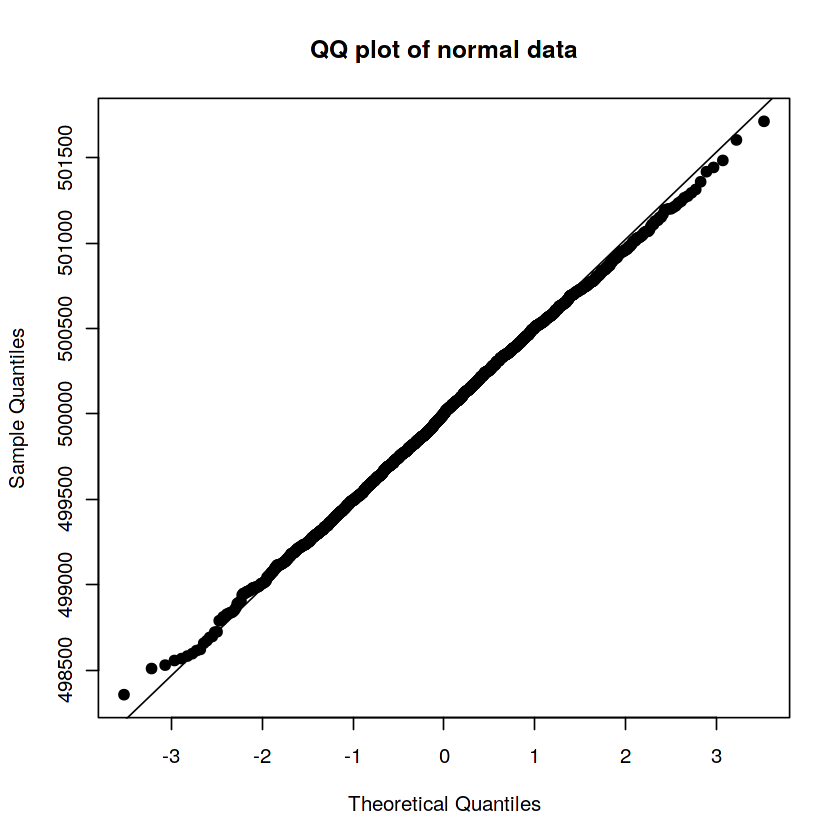

In [6]:
qqnorm(zeros,main="QQ plot of normal data",pch=19)
qqline(zeros)

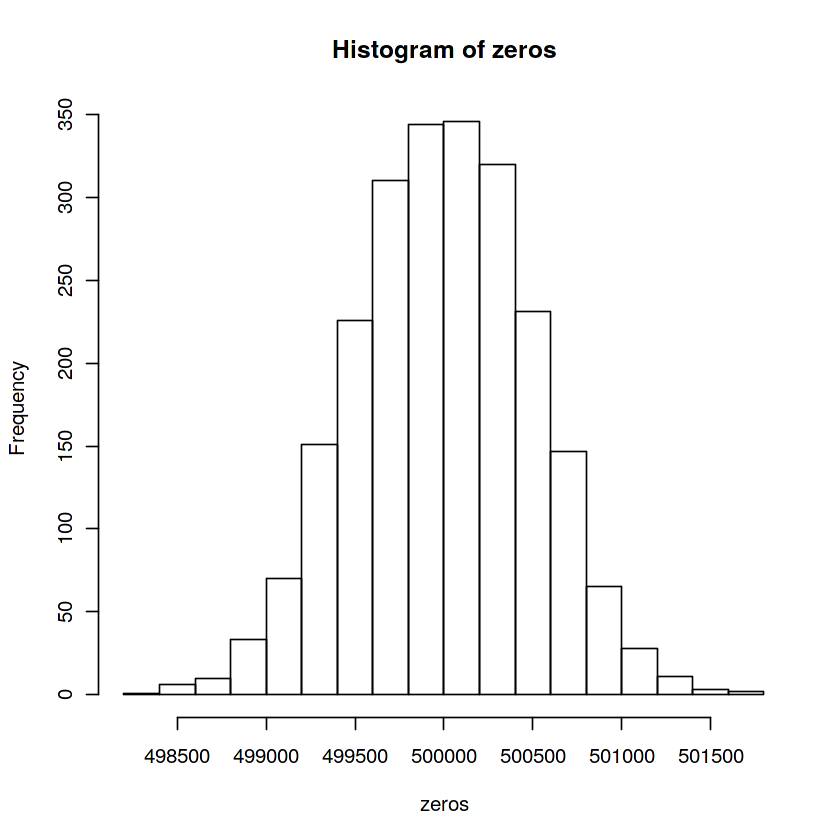

In [7]:
hist(zeros)

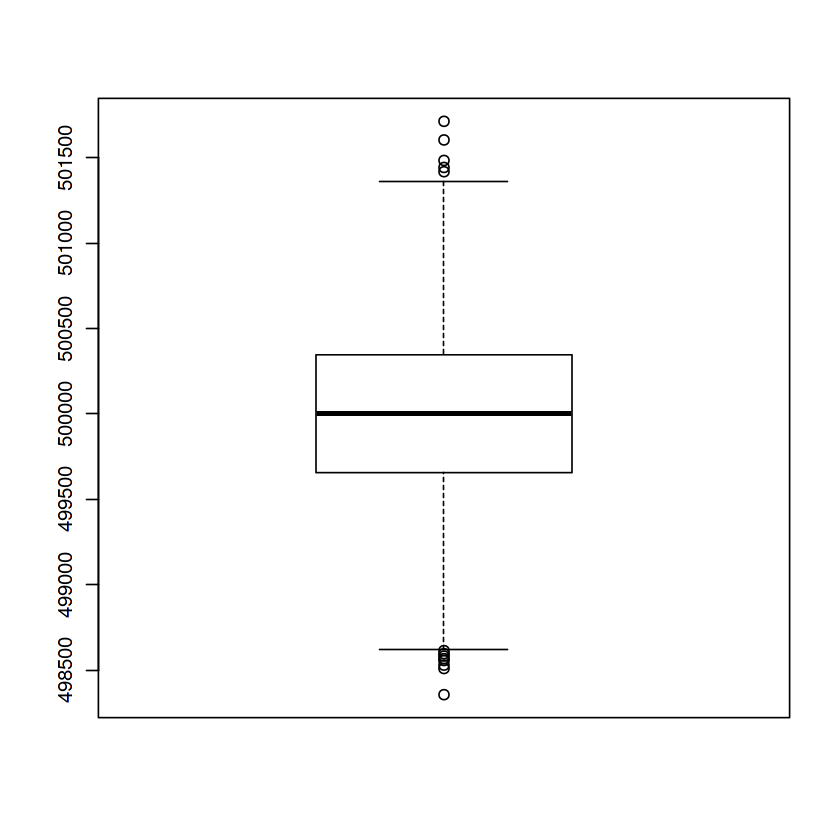

In [8]:
boxplot(zeros)

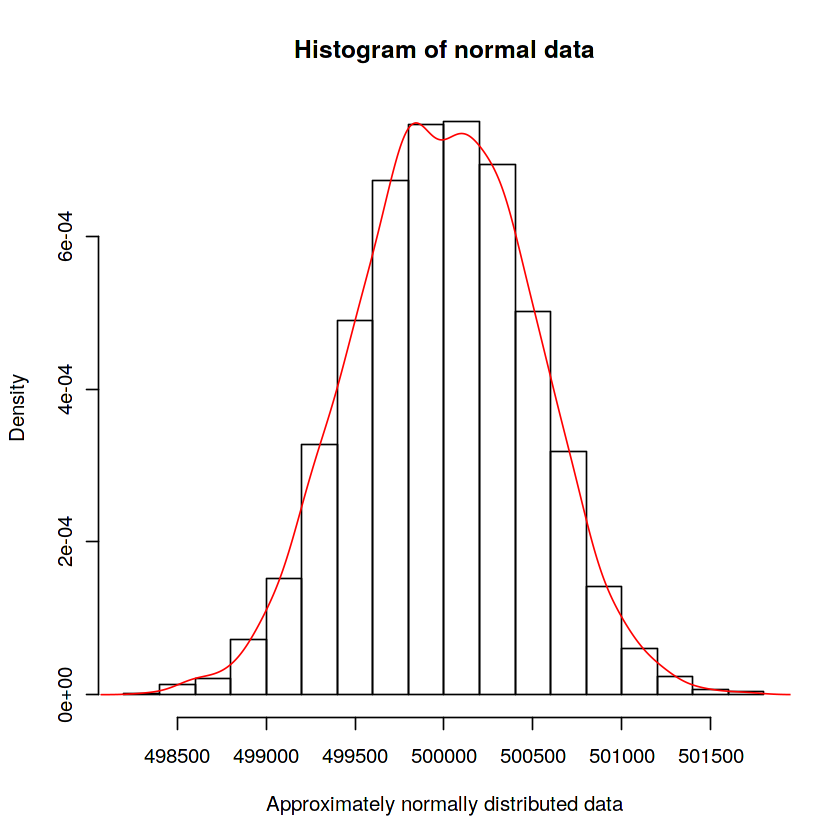

In [9]:
hist(zeros,probability=T, main="Histogram of normal data",xlab="Approximately normally distributed data")
lines(density(zeros),col=2)

#### OR claus publiques

In [10]:
t.test(zerosor)


	One Sample t-test

data:  zerosor
t = 94.815, df = 2303, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 550872.2 574140.1
sample estimates:
mean of x 
 562506.2 


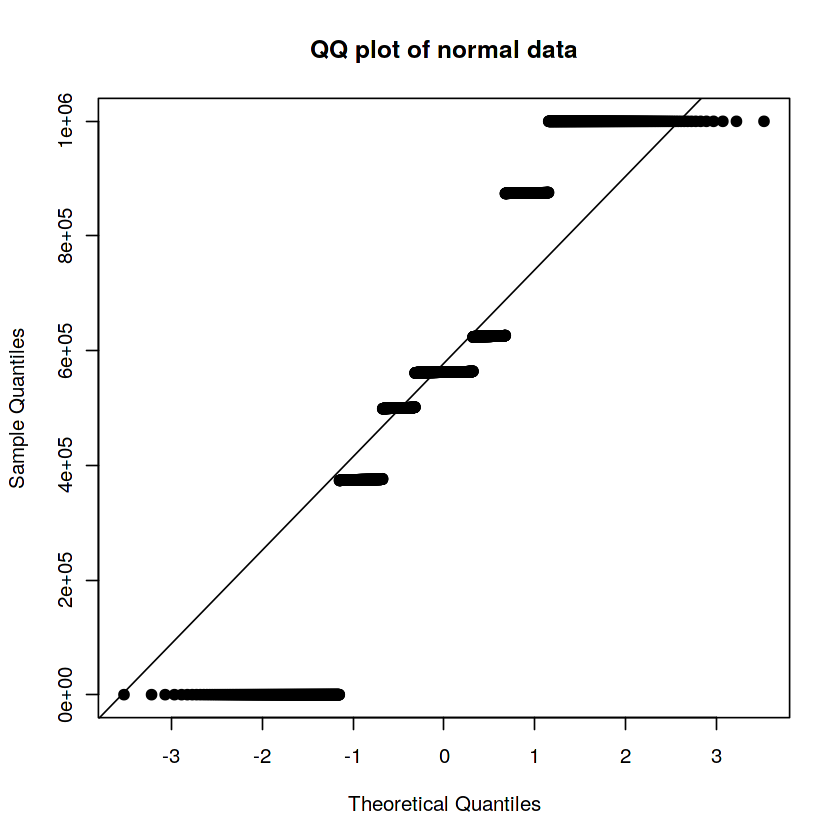

In [11]:
qqnorm(zerosor,main="QQ plot of normal data",pch=19)
qqline(zerosor)

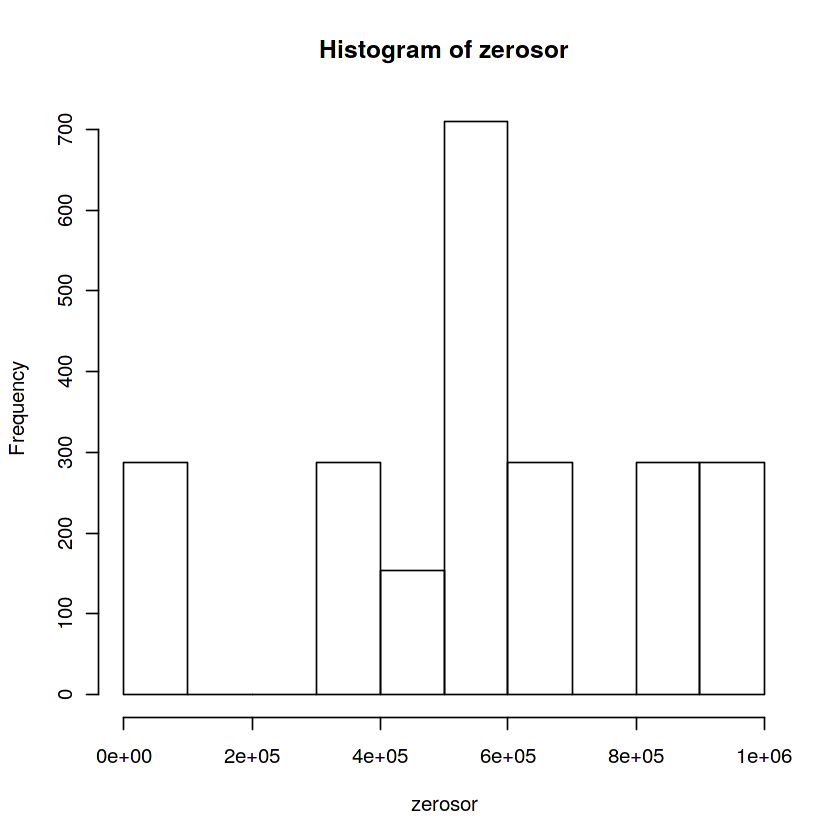

In [12]:
hist(zerosor)

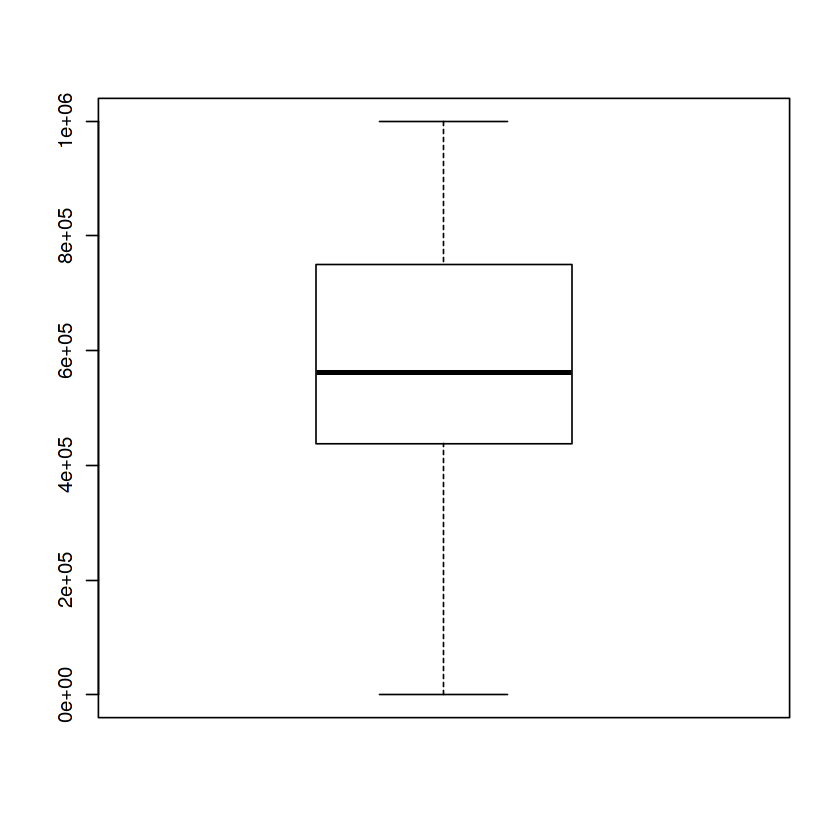

In [13]:
boxplot(zerosor)

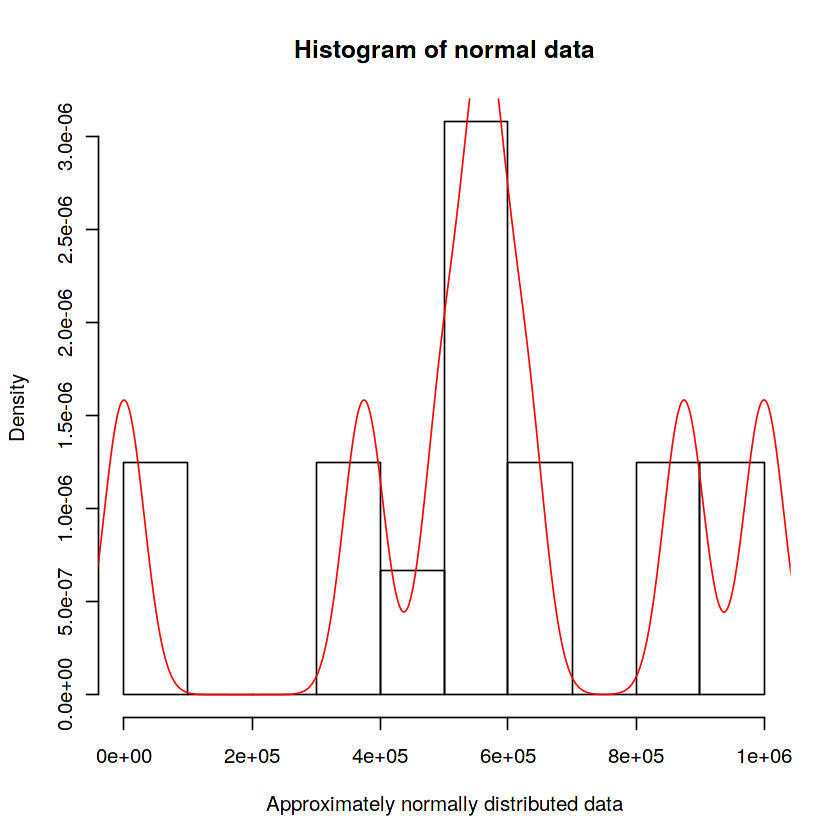

In [14]:
hist(zerosor,probability=T, main="Histogram of normal data",xlab="Approximately normally distributed data")
lines(density(zerosor),col=2)

#### Concatenant

In [15]:
t.test(zerosconca)


	One Sample t-test

data:  zerosconca
t = 94.815, df = 2303, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 550869.1 574136.8
sample estimates:
mean of x 
   562503 


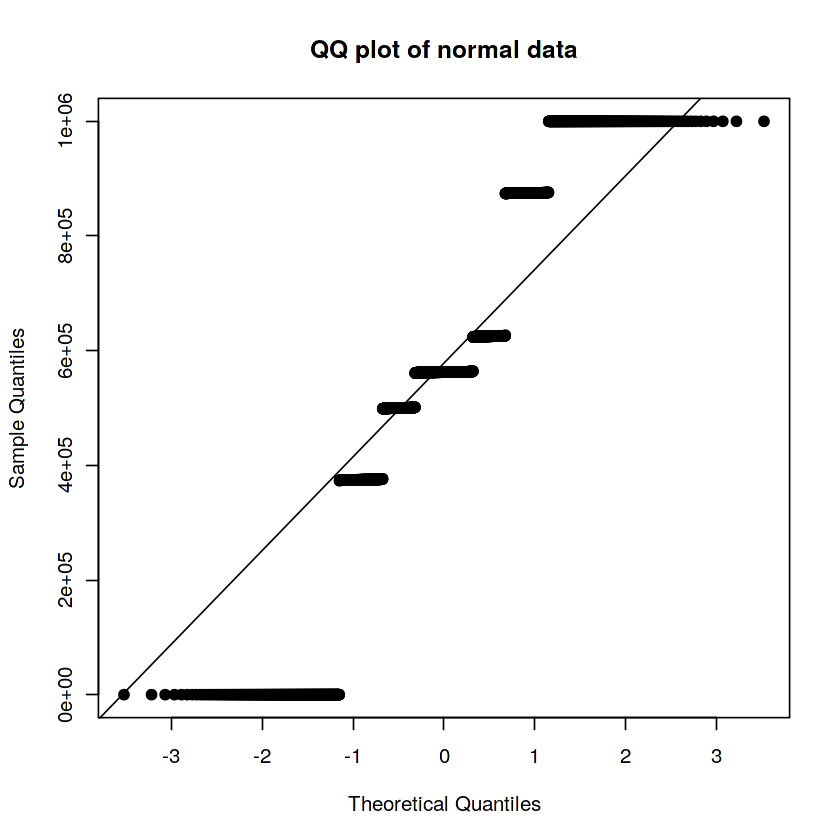

In [16]:
qqnorm(zerosconca,main="QQ plot of normal data",pch=19)
qqline(zerosconca)

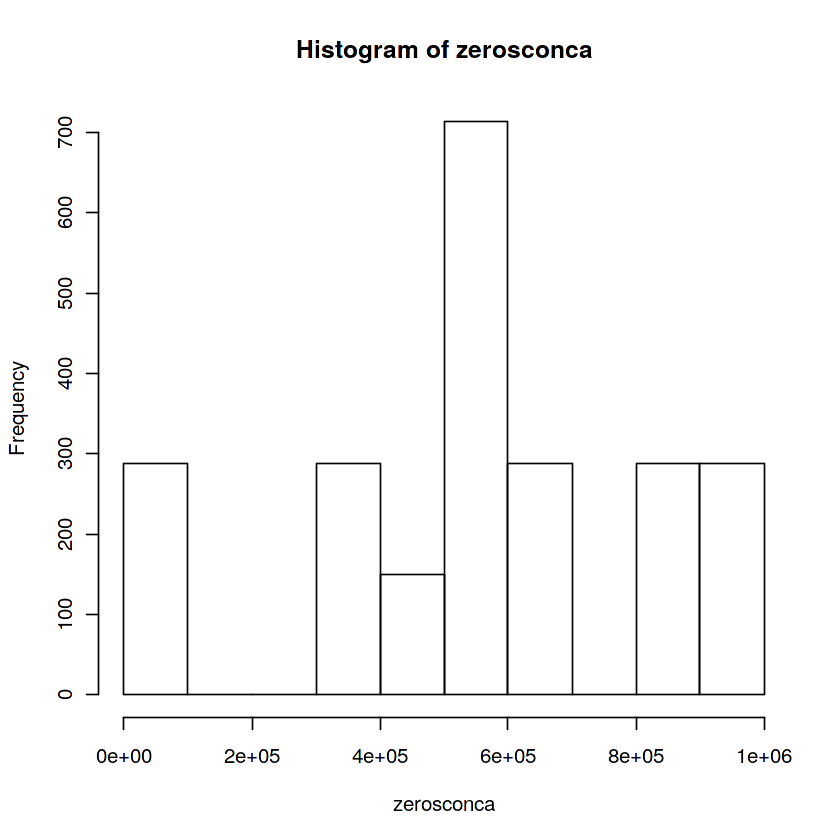

In [17]:
hist(zerosconca)

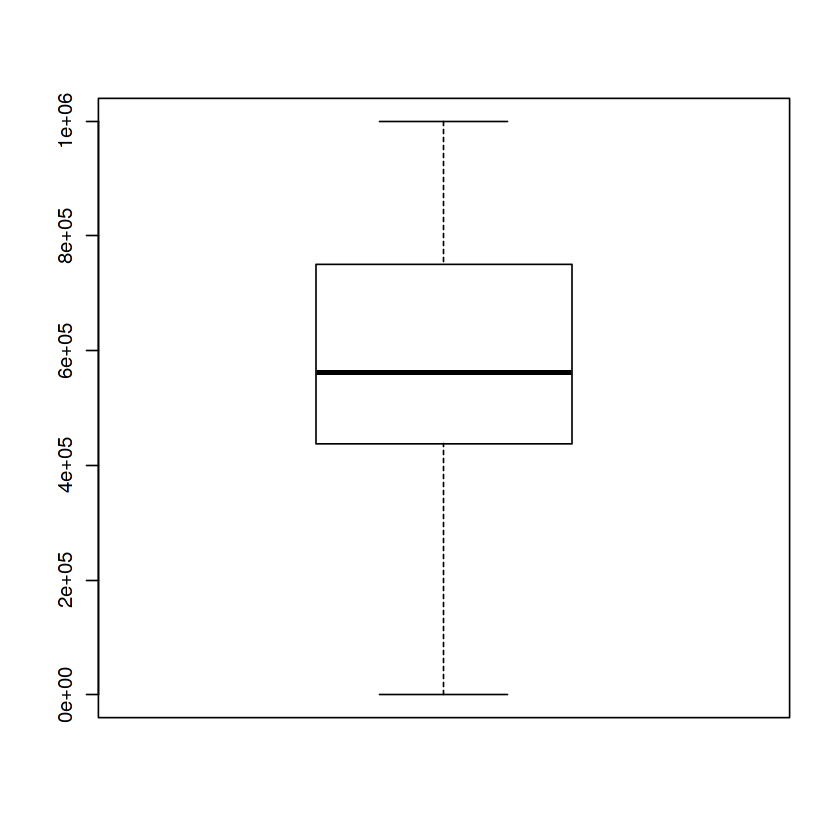

In [18]:
boxplot(zerosconca)

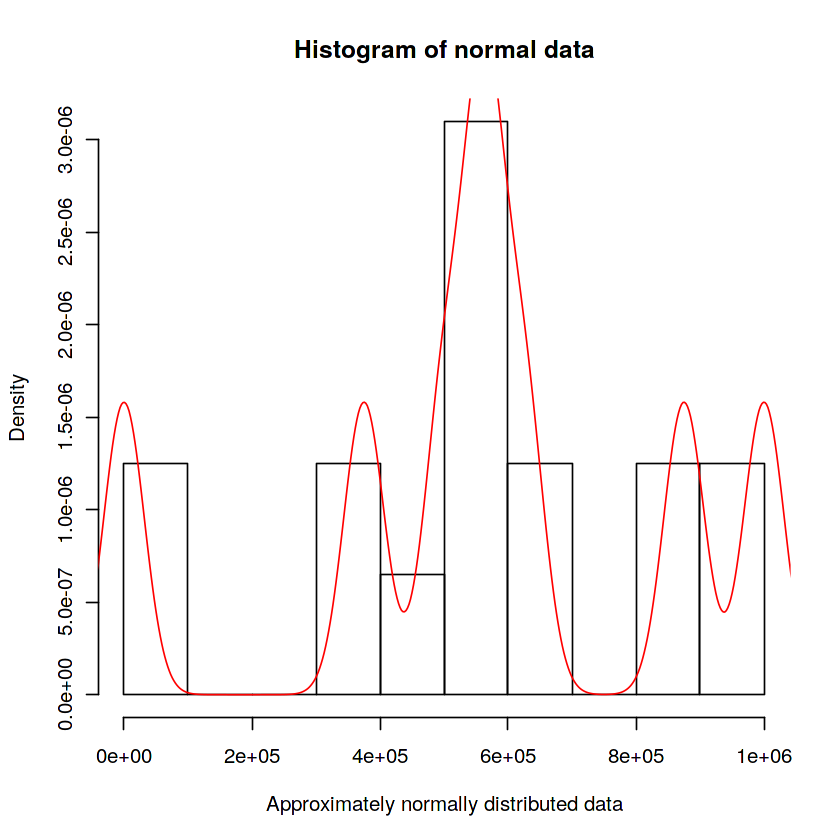

In [19]:
hist(zerosconca,probability=T, main="Histogram of normal data",xlab="Approximately normally distributed data")
lines(density(zerosconca),col=2)